In this section, we will study 2 problems:

            1. Extract an image_region based on a color_range_of_image by using HSV_space; then calculate the proportion of the region over whole image.
            2. Find the proportion by using boundary_extraction.

#### 1. Extract an image_region based on a color_range_of_image by using HSV_space; then calculate the proportion of the region over whole image.

**Loading an image with `cv2` and `matplotlib`**

To read an image; we use

            cv2.imread(path, color_flag = {0, 1,-1} )
            
Next, to display the image with `matplotlib` in `Red Green Blue` mode; we must change the `color_space` from `BGR (cv2)` to `RGB (matplotlib)` before using `imshow`

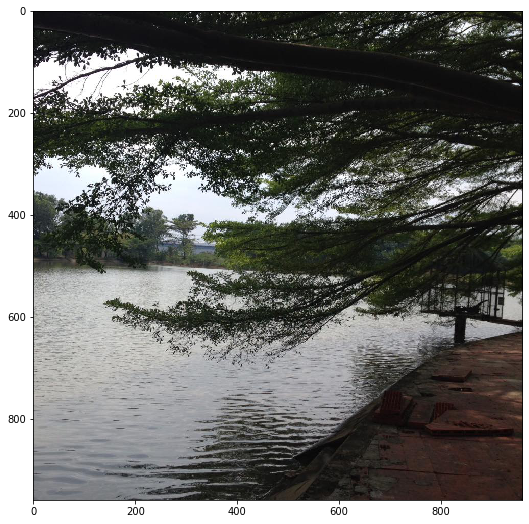

In [1]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread(r"C:\Users\Admin\Desktop\Nhan_pro\Data\computer_vision_data\fig4.jpg")
img_rgb_plt = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize = [10, 9])
plt.imshow(img_rgb_plt)

Now, using `hsv` and define a `green_range_color` in the following image

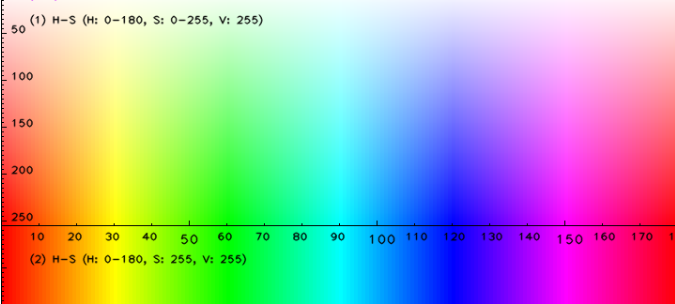

In [2]:
from IPython.core.display import Image, display
display(Image(r"C:\Users\Admin\Desktop\Nhan_pro\Data\computer_vision_data\hsv_range.png", width=960, unconfined=True))

To extract an `image_region` based on a given `color_range`; 
- Firstly, we must define the `upper_color_range & lower_color_range`.
- Next, convert the `image_source` to `HSV mode` then create the `mask_color` that which pixel is in this `color_range`.
- Finally, using `bitwise_and` to keep the image_region and fill black in the complement.

In the following code; to convenient, I use

                            green_RBG[green_RBG == [0, 0, 0]] = 255

to asign the `(black)` pixels (`values = [0, 0, 0]`) to `white ([255, 255, 255)`

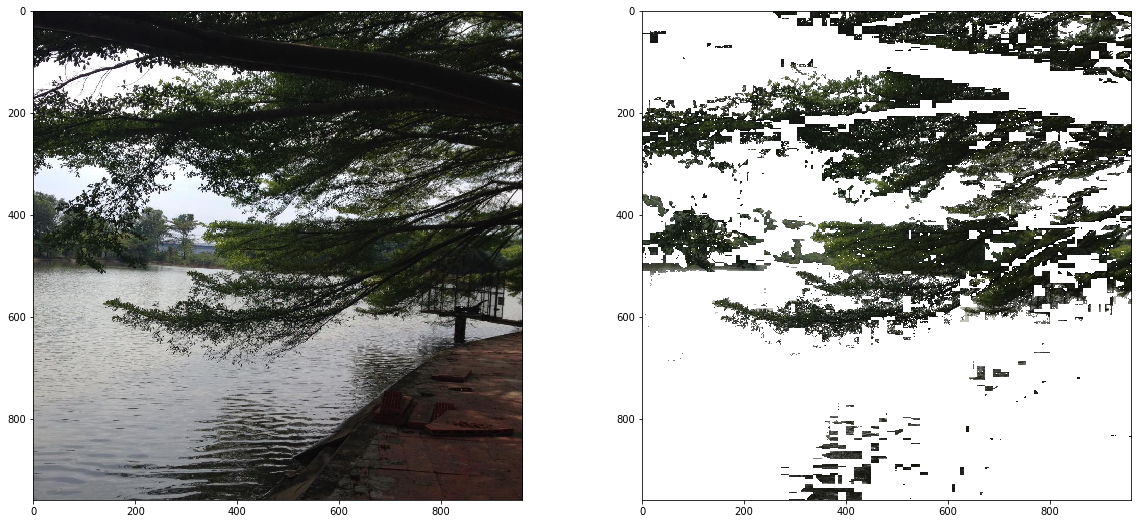

In [3]:
import numpy as np

lower_green = np.array([33, 10, 10])             
upper_green = np.array([64, 220, 255])

## convert the img_scr to HSV mode
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

## put the range of green colors to the mask in HSV's mode
mask_green = cv2.inRange(hsv_img, lower_green, upper_green)

## get the image_area which have the green_colors
green_BGR = cv2.bitwise_and(img, img, mask = mask_green)

## convert to RGB mode
green_RBG = cv2.cvtColor(green_BGR, cv2.COLOR_BGR2RGB)

## covert the complement to white color
green_RBG[green_RBG == [0, 0, 0]] = 255

## display
plt.figure(figsize = [20, 9])
plt.subplot(121); plt.imshow(img_rgb_plt)
plt.subplot(122); plt.imshow(green_RBG)

**Explore how many pixel is white??**

In [4]:
mask = green_RBG[green_RBG == 255]
mask.shape, img.shape

((1839598,), (960, 960, 3))

**Finally, find the proportion of `green_color (range)`**

In [5]:
green_prop = 1 - mask.shape[0] / (960*960*3)
green_prop

0.33463614004629627

**Example 1.2.** Find the proportion of the sky in the following image

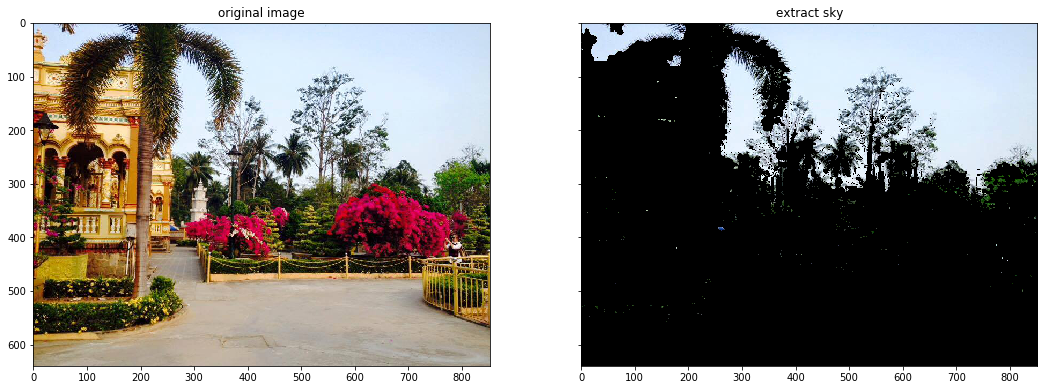

In [6]:
img = cv2.imread(r"C:\Users\Admin\Desktop\Nhan_pro\Data\computer_vision_data\fig3.jpg")

hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

img_rgb_plt = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
lower_blue = np.array([50, 15, 50])
upper_blue = np.array([120, 255, 255])

mask_blue = cv2.inRange(hsv_img, lower_blue, upper_blue)

blue_BGR = cv2.bitwise_and(img, img, mask = mask_blue)

blue_RBG = cv2.cvtColor(blue_BGR, cv2.COLOR_BGR2RGB)

fig2, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(18, 8),
                                sharex=True, sharey=True)


ax1.set_title("original image"); ax1.imshow(img_rgb_plt)

ax2.set_title("extract sky"); ax2.imshow(blue_RBG)

In [7]:
## since the complement of the sky is black, so
mask2 = blue_RBG[blue_RBG == 0]
w, h, k = img.shape
print("sky_prop = ", 1 - mask2.shape[0] / (w*h*k)) 

sky_prop =  0.28105743838028174


**Example 1.3.** and for the flower

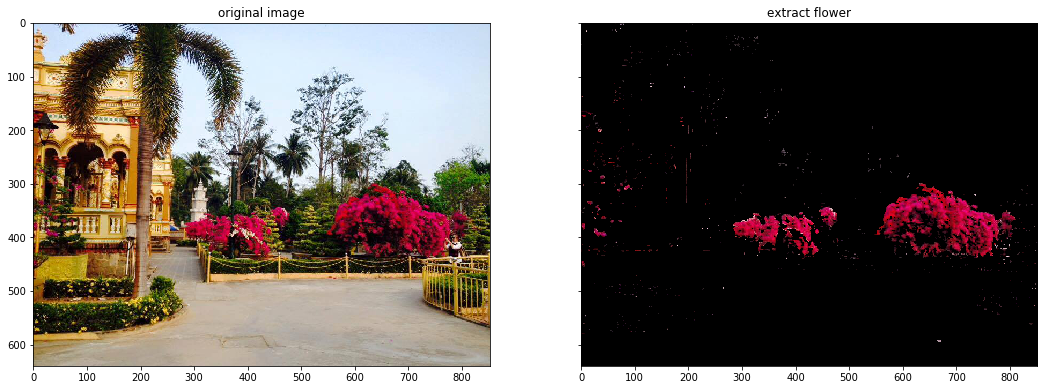

In [8]:
lower_pink = np.array([144, 30, 30])             
upper_pink = np.array([180, 255, 255])

hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

mask_pink = cv2.inRange(hsv_img, lower_pink, upper_pink)

pink_BGR = cv2.bitwise_and(img, img, mask = mask_pink)

pink_RBG = cv2.cvtColor(pink_BGR, cv2.COLOR_BGR2RGB)

fig2, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(18, 10),
                                sharex=True, sharey=True)


ax1.set_title("original image"); ax1.imshow(img_rgb_plt)

ax2.set_title("extract flower"); ax2.imshow(pink_RBG)

In [9]:
mask3 = pink_RBG[pink_RBG == 0]
w, h, k = img.shape
print("flower_prop = ", 1 - mask3.shape[0] / (w*h*k)) 

flower_prop =  0.062138766627543016


**Example 1.4.** For the building

building_prop =  0.12013876662754303


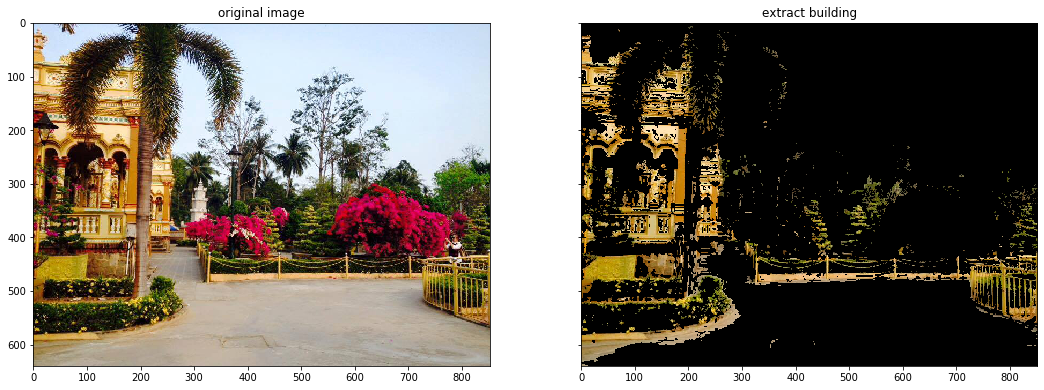

In [10]:
lower_yellow = np.array([16, 70, 70])             
upper_yellow = np.array([34, 255, 255])

hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

mask_yellow = cv2.inRange(hsv_img, lower_yellow, upper_yellow)

yellow_BGR = cv2.bitwise_and(img, img, mask = mask_yellow)

yellow_RBG = cv2.cvtColor(yellow_BGR, cv2.COLOR_BGR2RGB)

fig2, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(18, 8),
                                sharex=True, sharey=True)


ax1.set_title("original image"); ax1.imshow(img_rgb_plt)

ax2.set_title("extract building"); ax2.imshow(yellow_RBG)

mask4 = pink_RBG[pink_RBG == 0]
w, h, k = img.shape
print("building_prop = ", 1 - mask4.shape[0] / (w*h*k))

#### 2. Find the proportion by using boundary_extraction.

In this section; we will find the proportion of a `monkey_face` which be bounded by the given boundaries.

Beside that; we will study how to load an image in `scikit-image` or `skimage`

In [11]:
#! pip install scikit-image
import skimage
from skimage import color

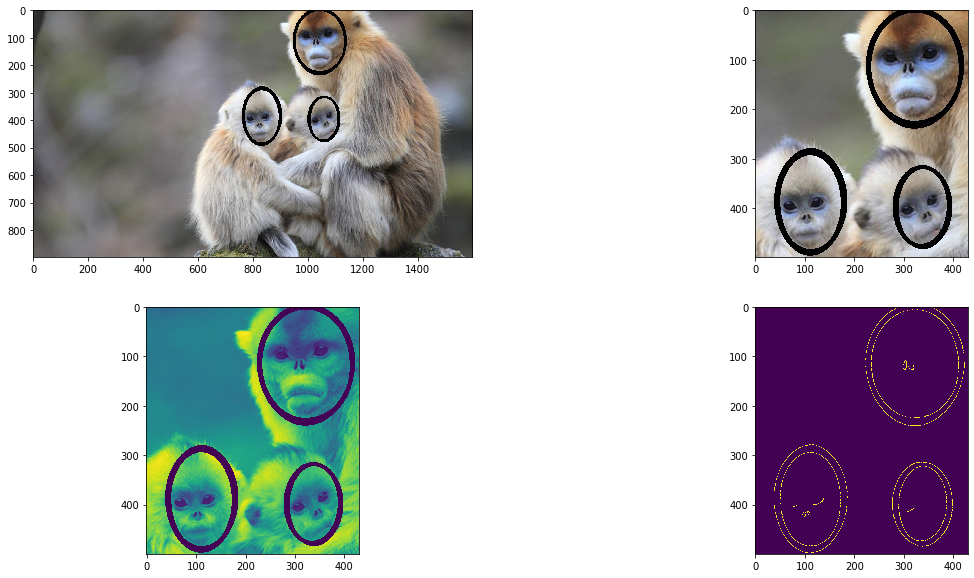

In [12]:
from skimage import io

# Load picture, convert to grayscale and detect edges
monkey = io.imread(r"C:\Users\Admin\Desktop\Nhan_pro\Data\computer_vision_data\monkey.jpg")

## Extract the exactly region contains the monkey
image_rgb = monkey[0:500, 720: 1150]

## convert the image to gray_mode
image_gray = color.rgb2gray(image_rgb)

## Extract exactly the edges from the images
edges = cv2.Canny(monkey[0:500, 720: 1150], 225, 450)

## display
plt.figure(figsize = [20, 10])
plt.subplot(221); plt.imshow(monkey)
plt.subplot(222); plt.imshow(image_rgb)
plt.subplot(223); plt.imshow(image_gray)
plt.subplot(224); plt.imshow(edges)

**Draw the `contours` on the image then fill in the `yellow`**

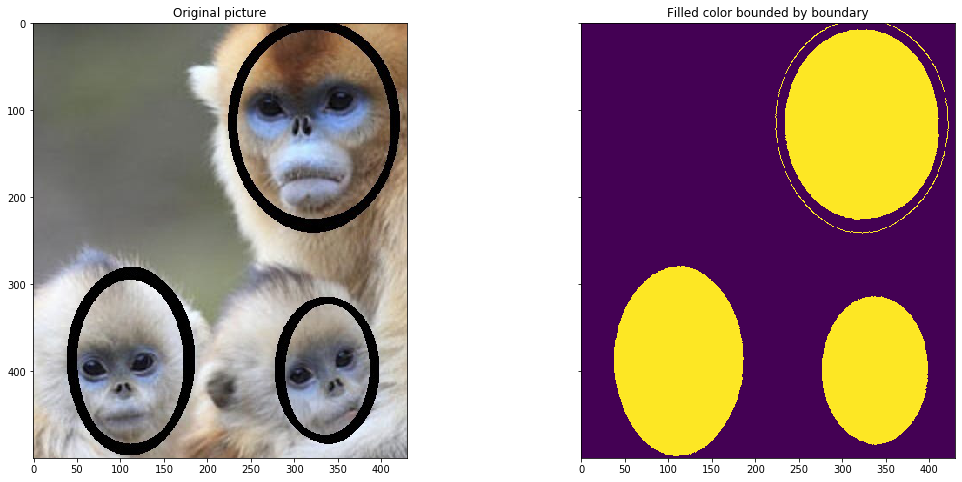

In [13]:
ret_val, monkey_2 = cv2.threshold(edges, 100, 255, 0)
new_im, contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
im_contours = cv2.drawContours(edges, contours, -1, (255,0,0), -1)

fig2, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(18, 8),
                                sharex=True, sharey=True)

ax1.set_title('Original picture')
ax1.imshow(image_rgb)

ax2.set_title('Filled color bounded by boundary')
ax2.imshow(im_contours)

plt.show()

In [14]:
mask5 = im_contours[im_contours == 0]
w,h,k = image_rgb.shape
print("prop_monkey_face = ", mask5.shape[0]/(w*h*k))

prop_monkey_face =  0.2455782945736434


In [15]:
mask4.shape, im_contours.shape, image_rgb.shape

((1553821,), (500, 430), (500, 430, 3))